# Análisis de Clustering con K-Means
Este notebook demuestra paso a paso cómo funciona el algoritmo **K-Means**, desde la generación de datos sintéticos hasta la evaluación del número óptimo de clusters usando el **método del codo**.

## ¿Qué es K-Means?

K-Means es un algoritmo de **clustering no supervisado** que organiza datos en `K` grupos o **clusters**. Su objetivo es minimizar la distancia entre los puntos y su **centroide** (punto central del grupo).

### Pasos del algoritmo:
1. Elegir `K` centroides iniciales aleatorios.
2. Asignar cada punto al centroide más cercano.
3. Recalcular los centroides como el promedio de los puntos asignados.
4. Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente.

K-Means es eficiente y útil para segmentar datos sin necesidad de etiquetas previas.

El objetivo es minimizar la **inercia**, que mide qué tan cerca están los puntos de sus respectivos centroides.

**Parámetro importante:**
1. n_init: número de veces que el algoritmo se ejecutará con diferentes centroides iniciales.
2. K-Means selecciona los mejores resultados según la inercia mínima obtenida.
3. Se recomienda especificar n_init explícitamente para evitar advertencias y mejorar estabilidad.

**n_init= Número de veces que el algoritmo K-Means se reinicia con diferentes centroides aleatorios.**

**Cada una de esas veces, el algoritmo:**

* Elige k centroides al azar.
* Ejecuta el clustering completo.
* Calcula la inercia final.
* Luego de todas las repeticiones, se elige el mejor resultado, es decir, el que tenga menor inercia (mejores agrupamientos).

**El algoritmo converge: K-Means repetirá los pasos de:**

1. Asignar puntos al centroide más cercano.
2. Recalcular los centroides.

**Hasta que:**

1. Los centroides no cambien significativamente (convergencia), o
2. Se alcance el límite de 300 iteraciones.
3. Entonces, si no hay convergencia antes, el algoritmo se detiene a la iteración 300 como máximo


In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Generación de datos
Usamos `make_blobs` para crear un conjunto de datos artificial que simula agrupaciones naturales.

make_blobs genera conjuntos de datos sintéticos que simulan agrupaciones (blobs)
útiles para probar algoritmos de clustering como K-Means.

**Parámetros:**
1.  n_samples: número total de puntos de datos a generar
2.  centers: número de centros de cluster (o coordenadas específicas de los centros)
3. n_features: número de características (dimensiones)
4. random_state: semilla para asegurar resultados reproducibles

In [7]:
n_samples = 300   # Número total de puntos de datos
n_features = 2          # Número de características (dimensiones)
n_clusters = 4          # Número de grupos (clusters) que queremos generar
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

## Visualización inicial de los datos

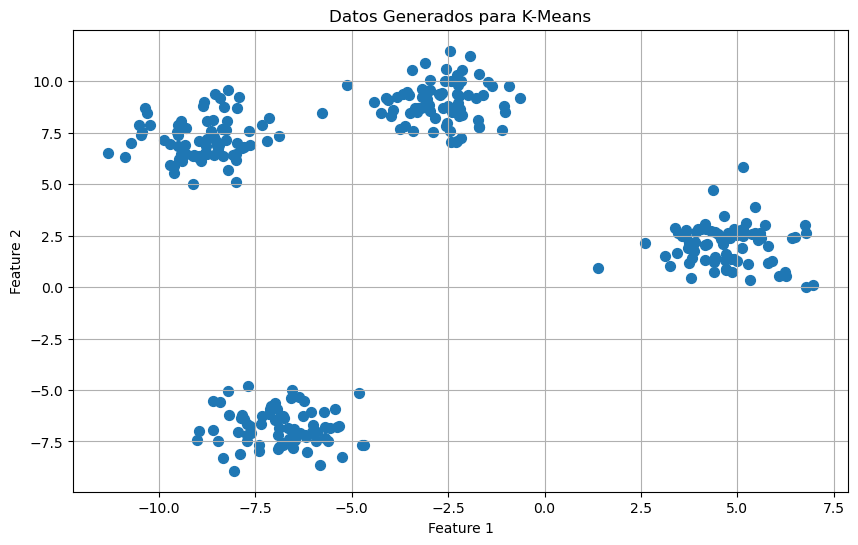

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos Generados para K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Entrenamiento del modelo K-Means

In [11]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Agregamos n_init explícito
kmeans.fit(X)  # Ajustar el modelo a los datos generados
y_kmeans = kmeans.predict(X) # Esto nos dice a qué cluster pertenece cada punto de datos según el modelo

## Resultados del agrupamiento

Los **centroides** representan el centro de cada grupo y son calculados como el promedio de los puntos asignados a ese grupo. Visualmente, los mostramos como puntos grandes en rojo.

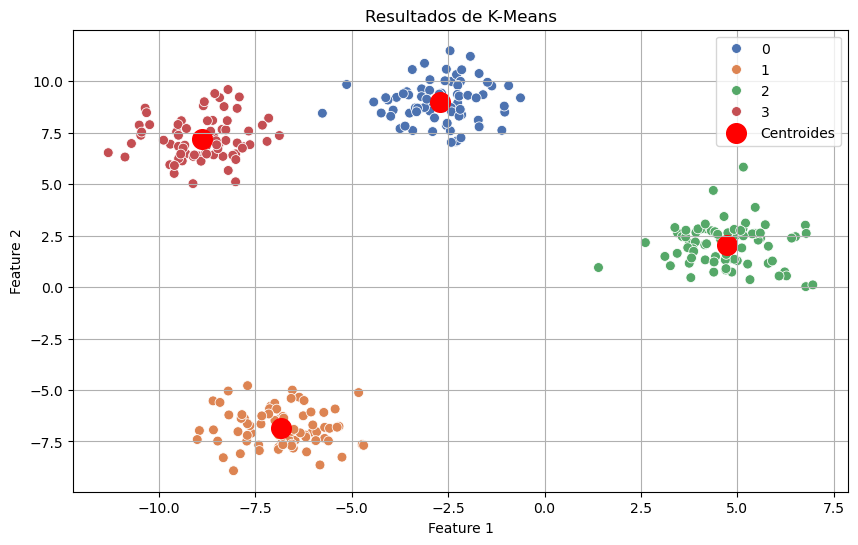

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='deep', legend='full', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', label='Centroides')# Colorear por cluster
# Los centroides son los puntos centrales de cada cluster. Representan la media de todos los puntos asignados a ese cluster.
# En K-Means, el algoritmo intenta encontrar la mejor posición de estos centroides para minimizar la inercia.
# Visualmente, son marcados como puntos grandes (aquí en rojo) en el gráfico.
plt.title('Resultados de K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Coordenadas de los centroides

In [16]:
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

Centroides de los clusters:
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


## ¿Qué es la Inercia?

La **inercia** es la suma de las distancias cuadradas desde cada punto hasta su centroide. Cuanto menor es la inercia, más compactos están los clusters.

**Importante:** por sí sola no indica si el modelo es bueno. Es necesario compararla con diferentes valores de `k`.

In [19]:
# Imprimir la inercia del modelo
# La inercia es la suma de las distancias cuadradas de cada punto al centro de su cluster.
# Sirve como una medida de qué tan compactos son los clusters formados.
# Cuanto menor sea la inercia, mejor es la agrupación (los puntos están más cerca de su centro).
# IMPORTANTE: Este valor por sí solo no dice si el modelo es bueno o no.
# Para evaluar si el número de clusters elegido es adecuado, se recomienda usar el método del codo.
print(f'Inercia: {kmeans.inertia_}')

Inercia: 564.9141808210252


## Método del Codo para determinar el número óptimo de clusters

Se ejecuta K-Means con distintos valores de `k` y se grafica la inercia. El "codo" en la curva muestra el punto a partir del cual aumentar `k` ya no mejora significativamente la agrupación.

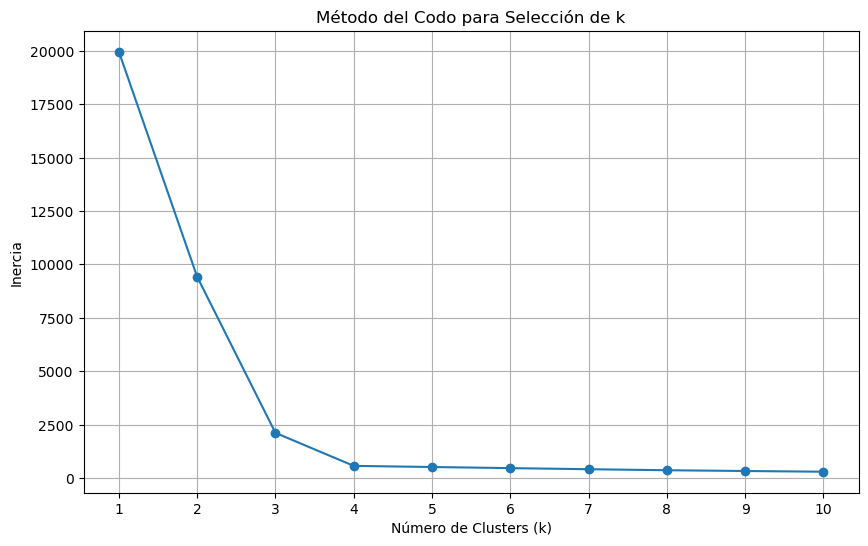

In [22]:
# Método del Codo para elegir el número óptimo de clusters
# Se entrena el modelo con diferentes valores de k (número de clusters)
# y se grafica la inercia correspondiente. El punto donde la inercia deja de disminuir rápidamente
# (donde se forma un "codo" en la gráfica) es un buen candidato para el número óptimo de clusters.
# Esto nos ayuda a decidir cuántos clusters usar sin que el modelo sea innecesariamente complejo.
inercia = []
k_range = range(1, 11)
for k in k_range:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X)
    inercia.append(modelo.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inercia, marker='o')
plt.title('Método del Codo para Selección de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Método del Codo para elegir el número óptimo de clusters
# Se entrena el modelo con diferentes valores de k (número de clusters)
# y se grafica la inercia correspondiente. El punto donde la inercia deja de disminuir rápidamente
# (donde se forma un "codo" en la gráfica) es un buen candidato para el número óptimo de clusters.
# Esto nos ayuda a decidir cuántos clusters usar sin que el modelo sea innecesariamente complejo.

## Interpretación del resultado del método del codo

El punto donde la curva de inercia cambia bruscamente de pendiente (forma un "codo") representa un buen equilibrio entre simplicidad y agrupamiento efectivo. Si el codo aparece en `k = 4`, ese número es adecuado para los datos.